In [1]:
import pandas as pd

In [58]:
pat = pd.read_csv('../physionet.org/files/mimiciii/1.4/PATIENTS.csv.gz')

In [59]:
pat.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0


In [60]:
pat['SUBJECT_ID'].nunique()

46520

In [61]:
pat.shape

(46520, 8)

In [110]:
stays = pd.read_csv('../physionet.org/files/mimiciii/1.4/ICUSTAYS.csv.gz')

In [111]:
stays.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,365,268,110404,280836,carevue,MICU,MICU,52,52,2198-02-14 23:27:38,2198-02-18 05:26:11,3.2490
1,366,269,106296,206613,carevue,MICU,MICU,52,52,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788
2,367,270,188028,220345,carevue,CCU,CCU,57,57,2128-06-24 15:05:20,2128-06-27 12:32:29,2.8939
3,368,271,173727,249196,carevue,MICU,SICU,52,23,2120-08-07 23:12:42,2120-08-10 00:39:04,2.0600
4,369,272,164716,210407,carevue,CCU,CCU,57,57,2186-12-25 21:08:04,2186-12-27 12:01:13,1.6202


In [114]:
stays['INTIME'] = pd.to_datetime(stays['INTIME'])

In [118]:
stays['diff_stays'] = stays.groupby('SUBJECT_ID')['INTIME'].diff()

In [119]:
stays.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS,diff_stays
0,365,268,110404,280836,carevue,MICU,MICU,52,52,2198-02-14 23:27:38,2198-02-18 05:26:11,3.2490,NaT
1,366,269,106296,206613,carevue,MICU,MICU,52,52,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788,NaT
2,367,270,188028,220345,carevue,CCU,CCU,57,57,2128-06-24 15:05:20,2128-06-27 12:32:29,2.8939,NaT
3,368,271,173727,249196,carevue,MICU,SICU,52,23,2120-08-07 23:12:42,2120-08-10 00:39:04,2.0600,NaT
4,369,272,164716,210407,carevue,CCU,CCU,57,57,2186-12-25 21:08:04,2186-12-27 12:01:13,1.6202,NaT


In [141]:
import matplotlib.pylab as plt

(-500, 500)

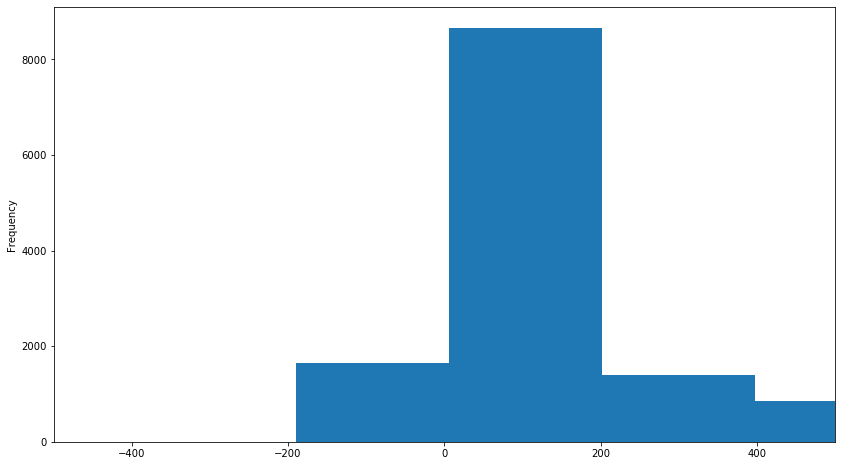

In [150]:
plt.figure(figsize=(14,8))
stays[~stays['diff_stays'].isna()]['diff_stays'].astype('timedelta64[D]').plot.hist(bins=40)
plt.xlim(-500, 500)

In [149]:
stays[~stays['diff_stays'].isna()]['diff_stays'].sort_values()

8380    -3715 days +07:59:48
31225   -3523 days +20:01:51
31889   -2971 days +05:22:58
38493   -2939 days +03:37:46
18925   -2482 days +19:45:36
                ...         
13722     3944 days 21:30:10
52165     3977 days 16:22:18
50154     3987 days 06:06:01
32757     4034 days 22:16:57
46239     4118 days 22:21:15
Name: diff_stays, Length: 15056, dtype: timedelta64[ns]

In [147]:
stays[~stays['diff_stays'].isna()]['diff_stays'].astype('timedelta64[D]')

15         50.0
19        100.0
21          8.0
25       1469.0
26        514.0
          ...  
61502      42.0
61507      31.0
61519      61.0
61524      23.0
61525      18.0
Name: diff_stays, Length: 15056, dtype: float64

In [64]:
stays.shape

(61532, 12)

In [65]:
stays['SUBJECT_ID'].nunique()

46476

In [66]:
grouped_pat = pd.DataFrame(stays.groupby('SUBJECT_ID')['ICUSTAY_ID'].nunique())

In [67]:
grouped_pat[grouped_pat['ICUSTAY_ID'] >1]

,ICUSTAY_ID
SUBJECT_ID,
7,2
17,2
21,2
23,2
34,2
...,...
99865,2
99883,2
99897,2


In [68]:
diag = pd.read_csv('../physionet.org/files/mimiciii/1.4/DIAGNOSES_ICD.csv.gz')

In [69]:
diag.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281
3,1300,109,172335,4.0,5855
4,1301,109,172335,5.0,4254


In [70]:
icd9_ref = pd.read_csv('../physionet.org/files/mimiciii/1.4/D_ICD_DIAGNOSES.csv.gz')

In [71]:
icd9_ref.head()

,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE
0,174,01166,TB pneumonia-oth test,"Tuberculous pneumonia [any form], tubercle bac..."
1,175,01170,TB pneumothorax-unspec,"Tuberculous pneumothorax, unspecified"
2,176,01171,TB pneumothorax-no exam,"Tuberculous pneumothorax, bacteriological or h..."
3,177,01172,TB pneumothorx-exam unkn,"Tuberculous pneumothorax, bacteriological or h..."
4,178,01173,TB pneumothorax-micro dx,"Tuberculous pneumothorax, tubercle bacilli fou..."


In [72]:
diag.dtypes

ROW_ID          int64
SUBJECT_ID      int64
HADM_ID         int64
SEQ_NUM       float64
ICD9_CODE      object
dtype: object

In [73]:
diag['ICD9_CODE'] = diag['ICD9_CODE'].astype(str)

In [74]:
icd9_ref['ICD9_CODE'] = icd9_ref['ICD9_CODE'].astype(str)

In [75]:
full_diag  = pd.merge(diag, icd9_ref, on='ICD9_CODE', how='left')

In [76]:
full_diag.head()

,ROW_ID_x,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,ROW_ID_y,SHORT_TITLE,LONG_TITLE
0,1297,109,172335,1.0,40301,4312.0,Mal hyp kid w cr kid V,"Hypertensive chronic kidney disease, malignant..."
1,1298,109,172335,2.0,486,5528.0,"Pneumonia, organism NOS","Pneumonia, organism unspecified"
2,1299,109,172335,3.0,58281,5892.0,Chr nephritis in oth dis,Chronic glomerulonephritis in diseases classif...
3,1300,109,172335,4.0,5855,5913.0,Chron kidney dis stage V,"Chronic kidney disease, Stage V"
4,1301,109,172335,5.0,4254,4435.0,Prim cardiomyopathy NEC,Other primary cardiomyopathies


In [95]:
malignant = full_diag[full_diag['LONG_TITLE'].str.contains('malignant',  na=False)]

In [96]:
pat_more_than_one_stay = grouped_pat[grouped_pat['ICUSTAY_ID'] >1].index

In [98]:
len(set(malignant['SUBJECT_ID']) & set(pat_more_than_one_stay))

2084

Int64Index([    7,    17,    21,    23,    34,    36,    41,    61,    67,
               68,
            ...
            99781, 99783, 99817, 99822, 99836, 99865, 99883, 99897, 99923,
            99982],
           dtype='int64', name='SUBJECT_ID', length=8755)